# TensorFlow Example: images classifications using CNN deep learning
## load to googledrive and open this jupyter notebook in collab
## Based on: TensorFlow 2.0 Practical in Udemy: https://www.udemy.com/course/tensorflow-2-practical/
## CIFAR-10 example with 60,000 low resolution photos of airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, trucks



In [0]:
#set up tf environment
!pip install --upgrade tensorflow

In [0]:
#import libraries
import pandas as pd
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.datasets import cifar10
tf.__version__

In [3]:
#load data, set train_test variables
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train / 255
X_test /255

X_train.shape

170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

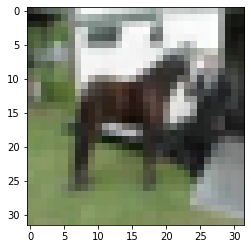

In [12]:
#sneak peek at some of the images
plt.imshow(X_test[20])

In [0]:
#model setup
model = tf.keras.models.Sequential()

In [0]:
# 1st Convolution and Max Pooling
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


In [0]:
# 2nd Convolution and Maxpooling
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid')) # Max Pooling

In [0]:
#Flatten
#ANN one Dense layer, no Dropout layer, one Output layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [26]:
# compile and call summary
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)             

In [27]:
model.fit(X_train,y_train, epochs=5)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 298s 6ms/sample - loss: 1.5274 - sparse_categorical_accuracy: 0.4881
Epoch 2/5
50000/50000 [==============================] - 299s 6ms/sample - loss: 1.0524 - sparse_categorical_accuracy: 0.6295
Epoch 3/5
50000/50000 [==============================] - 300s 6ms/sample - loss: 0.8935 - sparse_categorical_accuracy: 0.6879
Epoch 4/5
50000/50000 [==============================] - 304s 6ms/sample - loss: 0.7952 - sparse_categorical_accuracy: 0.7218
Epoch 5/5
50000/50000 [==============================] - 302s 6ms/sample - loss: 0.7014 - sparse_categorical_accuracy: 0.7533
10000/1 [==================================================================================================================================================================================================================================================================================================================================================